In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

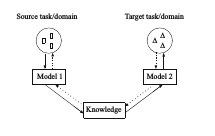

Fig.5 Transfer learning setup: storing knowledge gained from solving one problem and applying it to a different but related problem

## Transfer Learning

Traditional machine learning/data mining works well only when both training set and test set come from the same feature space and have the same distribution. This implies that whenever the data is changed, the model needs to be retrained, which may be too troublesome because:

- It is very expensive and difficult to obtain new training data for new datasets.
- Some datasets are easily outdated; that is, the data distribution in different periods will be different.

Therefore, in many real-world applications, when the distribution changes or data are outdated, most statistical models are no longer applicable and need to be rebuilt using newly collected training data. It is expensive or impossible to recollect the needed training data and rebuild the models. In such cases, knowledge transfer or transfer learning between tasks and domains would be desirable. Unlike traditional machine learning, transfer learning allows the domains, tasks, and distributions used in training and testing to be different. On the other hand, we easily obtain a large number of unlabeled images (or audio samples, or text documents) randomly downloaded from the Internet, and it is desirable to use such unlabeled images for improving performance on a given image (or audio, or text) classification task. Clearly, in such cases, it is not assumed that the unlabeled data follows the same class labels or generative distribution as the labeled data. Using unlabeled data in supervised classification tasks is known as self-taught learning (transfer learning from unlabeled data). Therefore, transfer learning or self-taught learning is widely applicable for typical semi-supervised or transfer learning settings in many practical learning problems.

Transfer learning can transfer previously acquired knowledge to a new task, helping the learning of a new task. Transfer learning has attracted more and more attention since 1995 under different names: learning to learn, life-long learning, knowledge transfer, inductive learning, multitask learning, knowledge consolidation, context-sensitive learning, knowledge-based inductive bias, metalearning, incremental/cumulative learning, and self-taught learning.

## Notations and Definitions

**Definition  (Domain)**: A domain $ D $ consists of two parts: a feature space $ X $ and a marginal probability distribution $ P(X) $, denoted as 

$$
D = \{X, P(X)\} 
$$ 

where $ X = \{x_1, \ldots, x_n\} \in X $ is a particular learning sample (set). For document classification with a bag-of-words representation, $ X $ is the space of all document representations, $ x_i $ is the $ i $-th term vector corresponding to some document, and $ X $ is the sample set of documents used for training.

In supervised learning, unsupervised learning, semi-supervised learning, inductive learning, and semi-supervised transductive learning discussed before, the source domain and the target domain are assumed to have the same feature space or the same marginal probability distribution. In these cases, we denote the labeled set $ D^{(l)} $, the unlabeled set 4 D^{(u)} $, and the test set $ D^{(t)} $ as:

$$
D^{(l)} = \{(x_{l1}, y_{l1}), \ldots, (x_{ln}, y_{ln})\} 
$$ 

$$
D^{(u)} = \{x_{u1}, \ldots, x_{un}\} 
$$ 

$$
D^{(t)} = \{x_{t1}, \ldots, x_{tn}\}
$$

respectively. There are two domains in machine learning: source domain $ D_S = \{X_S, P(X_S)\} $ and target domain $ D_T = \{X_T, P(X_T)\} $. These two domains are generally different; they may have different feature spaces $ X_S \neq X_T $ or different marginal probability distributions $ P(X_S) \neq P(X_T) $.

Let $ X_S = \{x_{S1}, \ldots, x_{Sn}\} $ and $ Y_S = \{y_{S1}, \ldots, y_{Sn}\} $ be, respectively, the sets of all labeled instances of source domain \( D_S \) and all corresponding labels of the source domain. Similarly, denote $ X_T = \{x_{T1}, \ldots, x_{Tn}\} $ and $ Y_T = \{y_{T1}, \ldots, y_{Tn}\} $.

The source-domain data and the target-domain data are, respectively, represented as:

$$
D_S = (X_S, Y_S) = \{(x_{S1}, y_{S1}), \ldots, (x_{Sns}, y_{Sns})\} \in D_S
$$

$$
D_T = (X_T, Y_T) = \{(x_{T1}, y_{T1}), \ldots, (x_{Tn}, y_{Tn})\} \in D_T
$$

where:
- $ x_{Si} \in X_S $ is the $ i $-th data instance of source domain $ D_S $ and $ y_{Si} \in Y_S $ is the corresponding class label for $ x_{Si} $.
- $ x_{Ti} \in X_T $ is the $ i $-th data instance of target domain $ D_T $ and $ y_{Ti} \in Y_T $ is the corresponding class label for $ x_{Ti} $.
- $ n_s $ and $ n_t $ are the numbers of source-domain data and target-domain data, respectively. In most cases, $ 0 \leq n_t \leq n_s $.

Let $ D_S^{(l)} $ and $ D_S^{(u)} $ be the labeled set and unlabeled set of data drawn from source domain $ D_S $, respectively. Similarly, $ D_T^{(l)} $ and $ D_T^{(u)} $ denote the labeled set and unlabeled set drawn from $ D_T $, respectively. Then we have the following notations:

$$
D_S^{(l)} = \{(x_{S1}, y_{S1}), \ldots, (x_{Sn}, y_{Sn})\}
$$

$$
D_S^{(u)} = \{x_{u1}, \ldots, x_{un}\}
$$

$$
D_T^{(l)} = \{(x_{T1}, y_{T1}), \ldots, (x_{Tn}, y_{Tn})\}
$$

$$
D_T^{(u)} = \{x_{T1}, \ldots, x_{Tn}\}
$$

where:
- $ x_S^{(l)} $ and $ x_S^{(u)} $ are the $ i $-th labeled and unlabeled data vectors drawn from the source domain, respectively; $ y_{Si} \in Y_S $ is the class label corresponding to $ x_{Si} $ drawn from the source domain;
- $ x_T^{(l)} $ and $ x_T^{(u)} $ are the $ i $-th labeled and unlabeled data vectors drawn from the target domain, respectively; $ y_{Ti} \in Y_T $ is the class label corresponding to $ x_T^{(l)} $ drawn from the target domain;
- $ n_l $ and $ n_u $ are the numbers of labeled and unlabeled data in the source (or target) domain.

It should be noted that $ D_S^{(l)} $ and $ D_S^{(u)} $ are disjoint: $ D_S^{(l)} \cap D_S^{(u)} = \emptyset $. Similarly, we have $ D^{(l)} \cap D^{(u)} = \emptyset $ as required in supervised learning, unsupervised learning, semi-supervised learning, inductive learning, and semi-supervised transductive learning discussed before.

When discussing machine learning in two different domains $ D_S $ and $ D_T $, we have two possible training sets $ D_{S_{train}} $ drawn from source domain $ D_S $ and $ D_{T_{train}} $ drawn from target domain $ D_T $ as follows:

$$
D_{S_{train}} = D_S^{(l)} \cup D_S^{(u)} \in D_S
$$

$$
D_{T_{train}} = D_T^{(l)} \cup D_T^{(u)} \in D_T
$$

where one of $ D_S^{(l)} $ and $ D_S^{(u)} $ may be empty, while $ D_T^{(l)} $ or $ D_T^{(u)} $ may also be empty, which corresponds to unsupervised and supervised learning cases, respectively.

**Definition 6.45 (Task)**: For a given (source or target) domain $ D = \{X, P(X)\} $, a task $ T $ consists of two parts: a label space $ Y $ and an objective predictive function $ f(\cdot) $, denoted by 

$$
T = \{Y, f(\cdot)\} 
$$ 

where $ f(\cdot) $ is a predictive function that maps $ x \in X $ to a label $ y \in Y $. 

The predictive function $ f(\cdot) $ is not observed but can be typically learned from the feature vector and label pairs $ (x_i, y_i) $, where $ x_i \in X $ and $ y_i \in Y $. The function $ f(\cdot) $ can be used to predict the corresponding label $ f(x_i) $ of a new instance $ x_i $. From a probabilistic viewpoint, $ f(x_i) $ is usually written as $ P(y_i | x_i) $. If the given specific domain is the source domain, i.e., $ D = D_S $, then the learning task is called the source learning task, denoted as $ T_S = \{Y_S, f_S(\cdot)\} $. Similarly, the learning task in the target domain is known as the target learning task, denoted as $ T_T = \{Y_T, f_T(\cdot)\} $.

For two different but relevant domains or tasks, if we transfer the model parameters trained in one domain (or task) to the new model in another domain (or task), it helps clearly to train the new dataset because this transfer can share the learned parameters with the new model to speed up and optimize the learning of the new model without learning from zero as before. Such machine learning is called transfer learning. 

**Definition (Transfer Learning)**: Given a source domain $ D_S $ and source learning task $ T_S $, a target domain $ D_T $ and target learning task $ T_T $. Transfer learning emphasizes the transfer of knowledge across domains, tasks, and distributions that are similar but not the same and aims to help improve the learning of the target predictive function $ f_T(\cdot) $ in $ D_T $ using the knowledge in $ D_S $ and $ T_S $, where $ D_S \neq D_T $ or $ T_S \neq T_T $. This definition shows that transfer learning consists of three parts:

1. Define source and target domains.
2. Learn on the source domain.
3. Predict or generalize on the target domain.

In transfer learning, the knowledge gained in solving the source (or target) task in the source (or target) domain is stored and then applied to solving another problem of interest. 

In most cases, there is only a single-loop transfer learning (shown by arrows with a solid line). However, in machine translation of two languages, there are two-loop transfer learning setups. In transfer learning, there are the following three main research issues:

- **What to transfer**: Which part of knowledge can be transferred across domains or tasks? If some knowledge is specific to individual domains or tasks, then there is no need to transfer it. Conversely, when some knowledge may be common...



Traditional machine learning relies on the assumption that both the training and test datasets come from the same feature space and share the same distribution. This can pose challenges when the data changes over time due to:

- The difficulty and cost of obtaining new training data.
- The potential for data sets to become outdated, leading to different distributions over time.

In such scenarios, transfer learning becomes a valuable approach. Transfer learning enables knowledge transfer between different tasks and domains, allowing the model to adapt to new data without needing to be retrained from scratch.

## Key Concepts of Transfer Learning

1. **What to Transfer**: Identify which parts of the knowledge can be transferred across domains or tasks. Some knowledge may be specific to individual domains or tasks, while other knowledge may be common across them.

2. **How to Transfer**: Develop learning algorithms that can effectively transfer knowledge. This includes training suitable models that leverage the source domain's data to improve performance in the target domain.

3. **When to Transfer**: The main idea is to improve the target learner using data from a related source domain. However, if the source domain is not well related to the target domain, this can lead to negative transfer, negatively impacting performance.

## Scenarios in Transfer Learning

In transfer learning, we define a domain as a pair $ D = \{X, P(X)\} $ and a task as a pair $ T = \{Y, P(Y|X)\} $. The conditions for two different domains $ D_S \neq D_T $ can present four scenarios:

1. **Different Feature Spaces**: $ X_S \neq X_T $ (e.g., cross-lingual adaptation in NLP).
2. **Different Probability Distributions**: $ P(X_S) \neq P(X_T) $ (e.g., documents focusing on different topics).
3. **Different Label Spaces**: $ Y_S \neq Y_T $ (e.g., different class definitions in defect-prone software projects).
4. **Different Conditional Probability Distributions**: $ P(Y_S|X_S) \neq P(Y_T|X_T) $ (e.g., class imbalance in datasets).

## Implementation



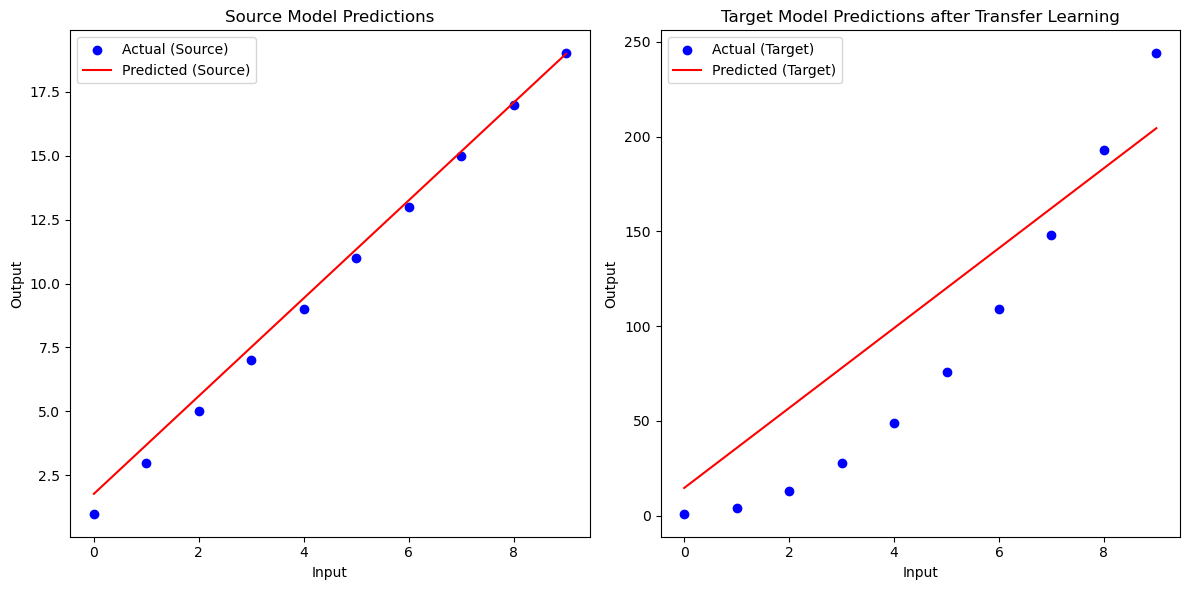

In [1]:
import random
import matplotlib.pyplot as plt

# Simulated source model
class SimpleSourceModel:
    def __init__(self):
        self.parameters = self.initialize_parameters()
    
    def initialize_parameters(self):
        # Initialize some simple parameters
        return {'weights': random.uniform(0, 1), 'bias': random.uniform(0, 1)}
    
    def train(self, data):
        # Simulate training by adjusting parameters based on data
        for x, y in data:
            self.parameters['weights'] += 0.1 * (y - (self.parameters['weights'] * x + self.parameters['bias']))
            self.parameters['bias'] += 0.1 * (y - (self.parameters['weights'] * x + self.parameters['bias']))
    
    def predict(self, x):
        return self.parameters['weights'] * x + self.parameters['bias']

# Target model that uses transfer learning
class TargetModel:
    def __init__(self, source_model):
        # Initialize with the parameters from the source model
        self.parameters = source_model.parameters.copy()
    
    def fine_tune(self, data):
        # Fine-tune the model with new data
        for x, y in data:
            self.parameters['weights'] += 0.05 * (y - (self.parameters['weights'] * x + self.parameters['bias']))
            self.parameters['bias'] += 0.05 * (y - (self.parameters['weights'] * x + self.parameters['bias']))
    
    def predict(self, x):
        return self.parameters['weights'] * x + self.parameters['bias']

# Simulated data for the source task (simple linear relationship)
source_data = [(x, 2 * x + 1) for x in range(10)]  # y = 2x + 1

# Simulated data for the target task (more complex relationship)
target_data = [(x, 3 * x ** 2 + 1) for x in range(10)]  # y = 3x^2 + 1

# Train the source model
source_model = SimpleSourceModel()
source_model.train(source_data)

# Create the target model and fine-tune it
target_model = TargetModel(source_model)
target_model.fine_tune(target_data)

# Prepare data for plotting
x_values = list(range(10))
source_predictions = [source_model.predict(x) for x in x_values]
target_predictions = [target_model.predict(x) for x in x_values]

# Extract actual target task data for comparison
actual_target_values = [y for _, y in target_data]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Source Model Predictions
plt.subplot(1, 2, 1)
plt.scatter([x for x, _ in source_data], [y for _, y in source_data], color='blue', label='Actual (Source)')
plt.plot(x_values, source_predictions, color='red', label='Predicted (Source)')
plt.title('Source Model Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plot Target Model Predictions
plt.subplot(1, 2, 2)
plt.scatter([x for x, _ in target_data], actual_target_values, color='blue', label='Actual (Target)')
plt.plot(x_values, target_predictions, color='red', label='Predicted (Target)')
plt.title('Target Model Predictions after Transfer Learning')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.tight_layout()
plt.show()


# Categorization of Transfer Learning

## Feature-Based Transfer Learning Approaches

Feature-based transfer learning approaches can be categorized in two ways, as depicted in Figure 6.6:

- **Asymmetric Transformation**: This approach transforms the features of the source domain through reweighting to better match the target domain.

- **Symmetric Transformation**: This method discovers underlying meaningful structures between the domains.

### Transformation Mapping

Figure.6 illustrates the transformation mapping:

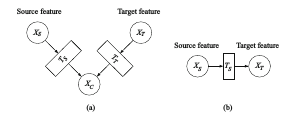

Fig.6 The transformation mapping [268]. (a) The symmetric transformation ($T_S$ and $T_T$ ) of the source-domain feature set $X_S = {x_Si }$ and target-domain feature set $X_T = {x_Ti }$ into a common latent feature set $X_C = {x_Ci }$. (b) The asymmetric transformation $T^T$ of the source-domain feature set $X_S$ to the target-domain feature set XT

1. **Symmetric Transformation (a)**: The transformation $ T_S $ and $ T_T $ of the source-domain feature set $ X_S = \{x^S_i\} $ and target-domain feature set $ X_T = \{x^T_i\} $ into a common latent feature set $ X_C = \{x^C_i\} $.

2. **Asymmetric Transformation (b)**: The transformation $ T_T $ of the source-domain feature set $ X_S $ to the target-domain feature set $ X_T $.

$$
\begin{array}{c}
\text{(a)} \\
\begin{array}{c}
\text{Source feature} \quad X_S \\
\downarrow T_S \\
X_C \\
\quad \uparrow T_T \\
\text{Target feature} \quad X_T \\
\end{array}
\end{array}
\quad
\begin{array}{c}
\text{(b)} \\
\begin{array}{c}
\text{Source feature} \quad X_S \\
\downarrow T_T \\
\text{Target feature} \quad X_T \\
\end{array}
\end{array}
$$

## Different Perspectives on Transfer Learning

### 1. According to Feature Spaces

Transfer learning can be categorized into two classes:

- **Homogeneous Transfer Learning**: The source domain and target domain share the same feature space $( X_S = X_T $). This includes instance-based transfer learning, asymmetric feature-based transfer learning, domain adaptation, parameter-based transfer learning, relational-based transfer learning, and hybrid-based transfer learning.

- **Heterogeneous Transfer Learning**: The source domain and target domain have different feature spaces ($ X_S \neq X_T $). This includes symmetric feature-based transfer learning and asymmetric feature-based transfer learning.

### 2. According to Computational Intelligence

Transfer learning can also be categorized as follows:

- **Transfer Learning Using Neural Networks**: Includes transfer learning using deep neural networks, convolutional neural networks, multiple task neural networks, and radial basis function neural networks.

- **Transfer Learning Using Bayesian Methods**: Includes naive Bayes, Bayesian networks, and hierarchical Bayesian models.

- **Transfer Learning Using Fuzzy Systems and Genetic Algorithms**: Includes fuzzy-based transductive transfer learning, frameworks for fuzzy transfer learning, generalized hidden-mapping ridge regression, and genetic transfer learning.

### 3. According to Tasks

Transfer learning can be categorized into three classes:

- **Inductive Transfer Learning**: The target task $ T_T $ is different from the source task $ T_S $ $( T_S \neq T_T $), regardless of whether the source and target domains are the same or not. Inductive transfer learning uses some labeled data in the target domain to induce an objective predictive model $ f_T(\cdot) $.

- **Transductive Transfer Learning**: Given a source domain $ D_S $ and a corresponding learning task $ T_S $, and a target domain $ D_T $ and a corresponding learning task $ T_T $, transductive transfer learning aims to improve the learning of the target predictive function $ f_T(\cdot) $ using knowledge from $ D_S $ and $ T_S $ where $ D_S \neq D_T $ and $ T_S = T_T $. Some unlabeled target-domain data must be available at training time.

- **Unsupervised Transfer Learning**: When $ D_S \neq D_T $ and $ T_S \neq T_T $, and no labeled data is available in either the source or target domains, unsupervised transfer learning aims to improve the learning of the target predictive function $ f_T(\cdot) $ in $ D_T $ using knowledge from $ D_S $ and $ T_S $.

## Comparison of Transfer Learning Settings

1. **Common Point**: Inductive, transductive, and unsupervised transfer learning do not assume that the unlabeled data $ x_j $ was drawn from the same distribution as the labeled data. This is a basic difference from traditional machine learning.

2. **Comparison of Assumptions**: Transductive transfer learning requires the source task and the target task to be the same $( T_S = T_T $), while both inductive and unsupervised transfer learning require $ T_S \neq T_T $.

3. **Comparison of Data Used**: Inductive transfer learning uses labeled data in the target domain, while transductive transfer learning uses unlabeled data available at training time. Unsupervised transfer learning does not use any labeled data.

4. **Comparison of Tasks**: Inductive transfer learning induces the target predictive model $ f_T(\cdot) $. In contrast, transductive and unsupervised transfer learning aim to improve the learning of $ f_T(\cdot) $ using knowledge from $ D_S $ and $ T_S $.



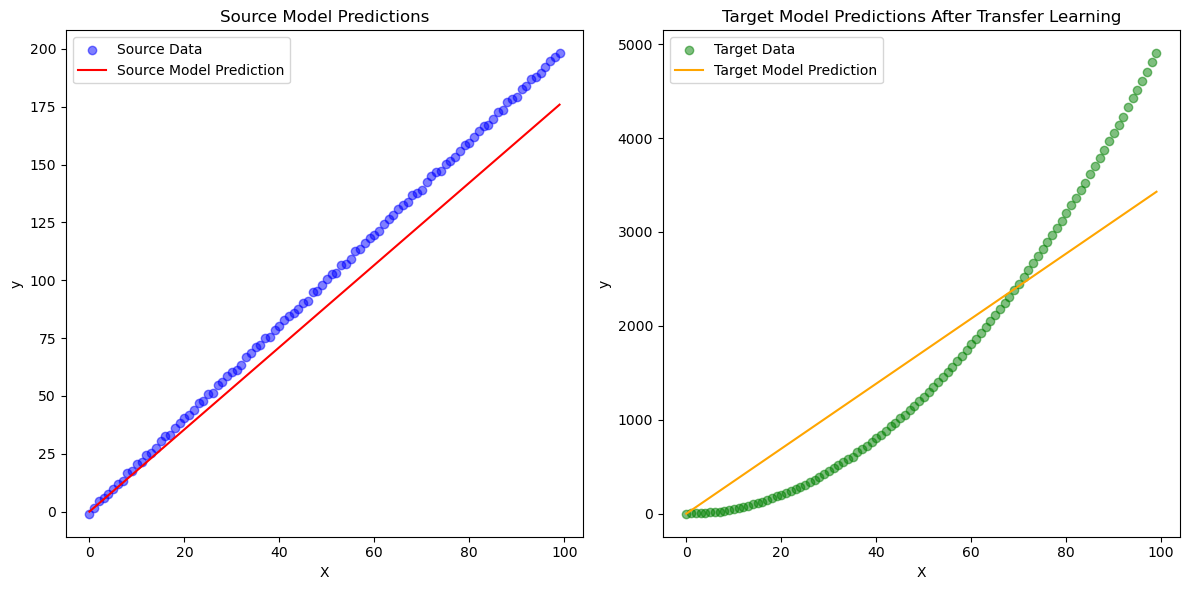

In [2]:
import matplotlib.pyplot as plt
import random

# SimpleSourceModel Class
class SimpleSourceModel:
    def __init__(self):
        # Initialize random parameters for the model
        self.params = random.uniform(0.5, 1.5)

    def train(self, X, y):
        # Simulate training by adjusting parameters based on the data
        self.params += sum(y) / len(y) * 0.01

    def predict(self, X):
        # Predict outputs based on the learned parameters
        return [self.params * x for x in X]

# TargetModel Class
class TargetModel:
    def __init__(self, source_model):
        # Start with the parameters of the source model
        self.params = source_model.params

    def fine_tune(self, X, y):
        # Fine-tune the model using target domain data
        self.params += sum(y) / len(y) * 0.02

    def predict(self, X):
        # Predict outputs based on the learned parameters
        return [self.params * x for x in X]

# Data Simulation
def create_synthetic_data_source(n=100):
    # Generate synthetic data for source task (linear)
    X = [i for i in range(n)]
    y = [2 * x + random.uniform(-1, 1) for x in X]  # Linear relationship
    return X, y

def create_synthetic_data_target(n=100):
    # Generate synthetic data for target task (quadratic)
    X = [i for i in range(n)]
    y = [0.5 * (x ** 2) + random.uniform(-5, 5) for x in X]  # Quadratic relationship
    return X, y

# Training and Fine-Tuning
def main():
    # Create synthetic data
    X_source, y_source = create_synthetic_data_source()
    X_target, y_target = create_synthetic_data_target()

    # Initialize and train the source model
    source_model = SimpleSourceModel()
    source_model.train(X_source, y_source)

    # Initialize the target model based on the source model
    target_model = TargetModel(source_model)
    target_model.fine_tune(X_target, y_target)

    # Generate predictions
    y_source_pred = source_model.predict(X_source)
    y_target_pred = target_model.predict(X_target)

    # Plotting predictions
    plt.figure(figsize=(12, 6))

    # Subplot for source model
    plt.subplot(1, 2, 1)
    plt.scatter(X_source, y_source, color='blue', label='Source Data', alpha=0.5)
    plt.plot(X_source, y_source_pred, color='red', label='Source Model Prediction')
    plt.title('Source Model Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    # Subplot for target model
    plt.subplot(1, 2, 2)
    plt.scatter(X_target, y_target, color='green', label='Target Data', alpha=0.5)
    plt.plot(X_target, y_target_pred, color='orange', label='Target Model Prediction')
    plt.title('Target Model Predictions After Transfer Learning')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


## Transfer Learning Concepts

Transfer learning is a critical area in machine learning that involves leveraging knowledge from one domain to improve performance in another domain. This section explores various categories and definitions related to transfer learning.

### Transfer Learning Types

1. **Inductive Transfer Learning**: In this setting, the target task $ T_T $ is different from the source task $ T_S $ (i.e., $ T_S \neq T_T $). The goal is to improve the performance of the target task using the knowledge acquired from the source task. 

2. **Transductive Transfer Learning**: This approach requires that the source and target tasks are the same (i.e., $ T_S = T_T $). The aim is to enhance the learning of the target predictive function $ f_T(\cdot) $ using labeled data from the source domain and unlabeled data from the target domain.

### Categorization of Inductive Transfer Learning

Inductive transfer learning can be further categorized based on the availability of labeled and unlabeled data in the source domain:

- **Multitask Learning**: This case occurs when a substantial amount of labeled data in the source domain is available. Inductive transfer learning aims to achieve high performance in the target task by transferring knowledge from the source task, while multitask learning seeks to learn both tasks simultaneously.
  
  **Definition 6.50 (Multitask Learning)**: For multiple related tasks, multitask learning is defined as an inductive transfer learning method based on shared representation, where multiple related tasks are learned together using labeled data from the source domain. The knowledge learned for each task can help improve the performance of other tasks. Key components include:
  
  - Model the task relatedness.
  - Learn all tasks simultaneously.
  - Tasks may have different data/features.

- **Self-Taught Transfer Learning**: This setting occurs when no labeled data in the source domain are available. Here, the focus is on determining whether the unlabeled examples come from the same input type or modality through transfer learning.

  **Definition (Self-Taught Transfer Learning)**: Given a labeled training set of $ m $ examples $\{(x_1, y_1), \ldots, (x_m, y_m)\}$ drawn independently from a distribution $ D $, where each $ x_i \in \mathbb{R}^n $ denotes an input feature vector and $ y_i \in \{1, \ldots, C\} $ is the corresponding class label. Additionally, a set of $ k $ unlabeled examples $ \{x_1^{(u)}, \ldots, x_k^{(u)}\} $ is provided. The aim is to ascertain whether $ x_i $ and $ x_j^{(u)} $ come from the same input type or modality.

## Transductive Transfer Learning

In transductive transfer learning, the source and target tasks are required to be the same $ (T_S = T_T) $, but the source and target domains differ. In this context, the source domain may have labeled data while the target domain may not.

### Cases of Transductive Transfer Learning

- **Heterogeneous Transfer Learning**: The feature spaces between the source and target domains are different $ (X_S \neq X_T) $.
  
- **Domain Adaptation**: The feature spaces are the same $ (X_S = X_T) $, but the marginal probability distributions of the input data are different $ (P(X_S) \neq P(X_T)) $.

  **Definition 6.52 (Domain Adaptation)**: Given two different domains $ D_S \neq D_T $ and a single task $ T_S = T_T $, domain adaptation aims to improve the learning of the target predictive function $ f_T(\cdot) $ using labeled data from the source domain and unlabeled or few labeled data from the target domain.

## Approaches to Transfer Learning

There are two main existing approaches to transfer learning:

1. **Instance-based Approach**: This approach learns different weights to rank training examples in a source domain for better learning in a target domain (e.g., boosting for transfer learning).

2. **Feature-based Approach**: This approach attempts to learn a common feature structure from different domains that can bridge the two domains for knowledge transfer (e.g., multitask learning, multi-domain learning, self-taught learning, and transfer learning via dimensionality reduction).


Training source model...
Fine-tuning target model...


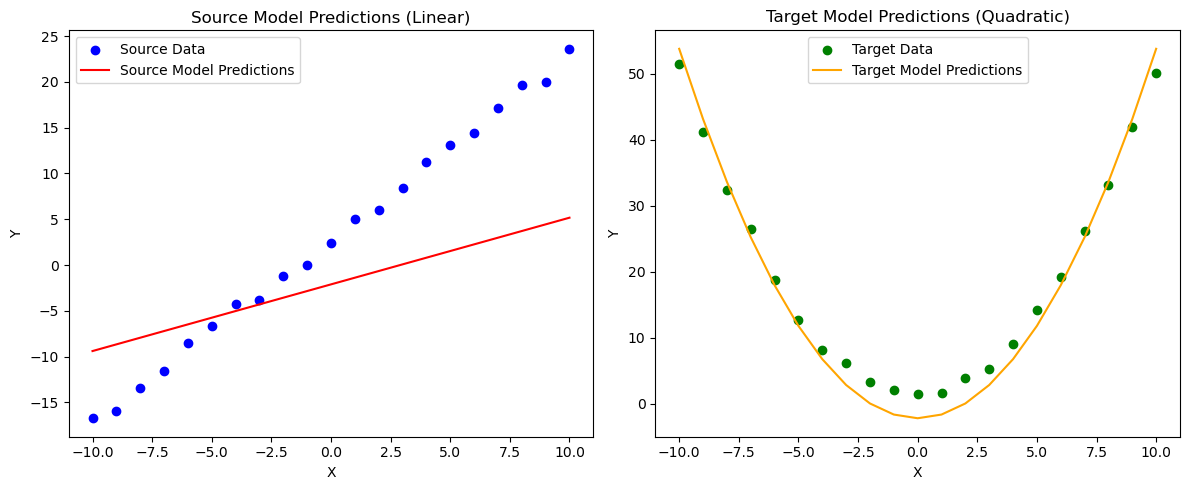

In [3]:
import matplotlib.pyplot as plt
import random

# Setting random seed for reproducibility
random.seed(42)

# SimpleSourceModel Class: Simulates a simple model for a source task
class SimpleSourceModel:
    def __init__(self):
        # Initializing model parameters (slope and intercept)
        self.slope = random.uniform(0.5, 1.5)
        self.intercept = random.uniform(-5, 5)
        
    def train(self, X, y):
        # A simple training simulation (no actual learning)
        print("Training source model...")
        # Assume the model parameters are already set during initialization

    def predict(self, X):
        # Making predictions using the linear model
        return [self.slope * x + self.intercept for x in X]

# TargetModel Class: Represents the target model
class TargetModel:
    def __init__(self, source_model):
        # Initialize with parameters from the source model
        self.slope = source_model.slope
        self.intercept = source_model.intercept
    
    def fine_tune(self, X, y):
        # Simple fine-tuning process (no actual learning)
        print("Fine-tuning target model...")
        # Slightly adjust parameters for the quadratic function
        self.slope += random.uniform(-0.2, 0.2)
        self.intercept += random.uniform(-0.2, 0.2)

    def predict(self, X):
        # Making predictions using the target model (quadratic)
        return [self.slope * x**2 + self.intercept for x in X]

# Data Simulation: Generate synthetic data for the source and target tasks
def generate_data():
    # Source data (linear)
    X_source = [i for i in range(-10, 11)]
    y_source = [2 * x + 3 + random.uniform(-1, 1) for x in X_source]  # Linear data with noise

    # Target data (quadratic)
    X_target = [i for i in range(-10, 11)]
    y_target = [0.5 * x**2 + 1 + random.uniform(-1, 1) for x in X_target]  # Quadratic data with noise

    return X_source, y_source, X_target, y_target

# Training and Fine-Tuning Process
X_source, y_source, X_target, y_target = generate_data()

# Train the source model
source_model = SimpleSourceModel()
source_model.train(X_source, y_source)

# Fine-tune the target model
target_model = TargetModel(source_model)
target_model.fine_tune(X_target, y_target)

# Prediction and Plotting
y_pred_source = source_model.predict(X_source)
y_pred_target = target_model.predict(X_target)

# Plotting the results
plt.figure(figsize=(12, 5))

# Source model predictions
plt.subplot(1, 2, 1)
plt.scatter(X_source, y_source, color='blue', label='Source Data')
plt.plot(X_source, y_pred_source, color='red', label='Source Model Predictions')
plt.title('Source Model Predictions (Linear)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Target model predictions
plt.subplot(1, 2, 2)
plt.scatter(X_target, y_target, color='green', label='Target Data')
plt.plot(X_target, y_pred_target, color='orange', label='Target Model Predictions')
plt.title('Target Model Predictions (Quadratic)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
